In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
#from netCDF4 import Dataset

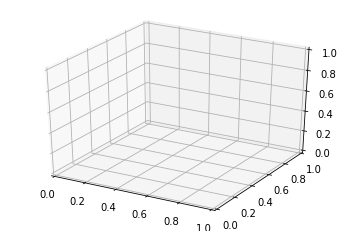

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [8]:
# Define lower left, uperright lontitude and lattitude respectively
extent = [-118.67, -64.52, 23.41, 45.44]
# Create a basemap instance that draws the Earth layer
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             projection='stere', resolution='l', fix_aspect=False, ax=ax,lat_0=90,lon_0=-105,area_thresh=10000)


# Add Basemap to the figure
ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
ax.add_collection3d(bm.drawcountries(linewidth=0.35))
ax.view_init(azim=230, elev=50)
ax.set_xlabel('Longitude (°E)', labelpad=20)
ax.set_ylabel('Latitude (°N)', labelpad=20)
ax.set_zlabel('Altitude (km)', labelpad=20)
# Add meridian and parallel gridlines
lon_step = 30
lat_step = 30
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
ax.set_yticks(parallels)
ax.set_yticklabels(parallels)
ax.set_xticks(meridians)
ax.set_xticklabels(meridians)
ax.set_zlim(0., 1000.)
ax.add_collection3d(bm.drawcounties(linewidth=0.35))


ax.add_collection3d(bm.drawcoastlines(color='white', linewidth=0.2) )

ax.bar3d(-80, 40, 0, 1, 1, 600)

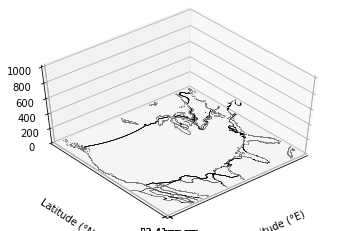

In [9]:
fig

In [ ]:
# empty array for place holder
lons = np.array([50]) # longtitude
lats = np.array([0]) # latitude
msl_alt = np.array([600]) # altitude
elec_dens = np.array([600]) # electron density
tec_cal = np.array([1000]) # calibrated total electron content

# Make sure your working directory is the directory contains this script and the data file.
#directory = os.fsencode('.')



In [ ]:
# scatter map based on lons, lats, alts and color based on the total electron content.
p = ax.scatter(lons, lats, msl_alt, c=tec_cal, cmap='jet')
# Add a colorbar to reference the intensity
#fig.colorbar(p, label='alibrated Total Electronic Content (TECU)')



In [ ]:
#fig.savefig('test')

In [ ]:
fig

In [11]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()

In [26]:
# Create a map widget
map1 = gis.map('Louisville', mode="3D") # Passing a place name to the constructor
                        # will initialize the extent of the map.
    
#map1.basemap = 'dark-gray-vector'
map1.tilt = 45
map1

MapView(layout=Layout(height='400px', width='100%'), mode='3D', tilt=45.0)

In [ ]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
anon_gis = GIS()
hurricane_layer = FeatureLayer(
    url="https://sampleserver6.arcgisonline.com/arcgis/rest/services/Hurricanes/MapServer/0")
hurricane_map = anon_gis.map('Atlantic Ocean', 3)
hurricane_map.add_layer(hurricane_layer)
hurricane_map

In [ ]:
hurricane_map_3D = anon_gis.map('Atlantic Ocean', 3)
hurricane_map_3D.mode = "3D"
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
  "type": "simple",  # JS type of new SimpleRenderer()
  "symbol": {
    "type": "point-3d",  #JS type of new PointSymbol3D()
    "symbolLayers": [{  
      "type": "object",  #JS type of new ObjectSymbol3DLayer()
      "resource": { "primitive": "sphere" },
      "width": 50000
    }]
  },
}

hurricane_map_3D.add_layer(hurricane_layer, renderer)
hurricane_map_3D

In [ ]:
visual_var_map = anon_gis.map('Atlantic Ocean', 3)
visual_var_map.mode = "3D"
#Update the renderer to include visual variable information
renderer["visualVariables"] = [{ #JS configuration of visualVariables
    "type": "color",
    "field": "PRESSURE", 
    "stops": [
      { "value": 950, "color": "red" },
      { "value": 1020, "color": "blue" }
    ]
  }, {
    "type": "size",
    "field": "WINDSPEED",
    "stops": [
      { "value": 20, "size": 60000 },
      { "value": 150, "size": 500000 }
    ],
    "axis": 50
  }, {
    "type": "size",
    "axis": "width-and-depth",
    "useSymbolValue": True
  }]
visual_var_map.add_layer(hurricane_layer, renderer)
visual_var_map

In [16]:


import arcgis
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()

zion_map = gis.map("Angel's Landing UT", 15)
zion_map.mode = "3D"
zion_map.tilt= 40
zion_map.heading = 180

zion_map

MapView(heading=180.0, layout=Layout(height='400px', width='100%'), mode='3D', tilt=40.0)

In [18]:
trails_layer = gis.content.get('dd0889d7ccd340dd876dac12184e99f9').layers[0]
zion_map.add_layer(trails_layer)
zion_map

MapView(heading=359.99568614518694, jupyter_target='notebook', layout=Layout(height='400px', width='100%'), mo…

In [19]:
symbol = {
  "type": "line-3d",  # JS type of new LineSymbol3D()
  "symbolLayers": [{
    "type": "path",  # JS type of new PathSymbol3DLayer()
    "size": 20,  # 20 meters in diameter
    "material": { "color": "#0083ff" } #The hex color code
  }]
}
zion_map.add_layer(trails_layer,
    {"renderer" : "autocast", #Tell Python to autocast JS types
     "type" : "simple",  #JS type of SimpleRenderer()
     "symbol": symbol}   #The symbol we previously defined
)

In [20]:
zion_map.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': -12573456.64044217,
 'y': 4476861.2153126905,
 'z': 1638.3878966225311}
zion_map.zoom= 15.528381436708822
zion_map.heading = 190
zion_map.tilt = 45

In [30]:

gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")
usa_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map
usa_map

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:

freeway_feature_layer = gis.content.get('51275617f1274103b81d99cd0ad94a40').layers[0]
usa_map.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PolyCollection
import numpy as np

map = Basemap(llcrnrlon=-20,llcrnrlat=0,urcrnrlon=15,urcrnrlat=50,)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_axis_off()
ax.azim = 270
ax.dist = 7

polys = []
for polygon in map.landpolygons:
    polys.append(polygon.get_coords())


lc = PolyCollection(polys, edgecolor='black',
                    facecolor='#DDDDDD', closed=False)

ax.add_collection3d(lc)
ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))

lons = np.array([-13.7, -10.8, -13.2, -96.8, -7.99, 7.5, -17.3, -3.7])
lats = np.array([9.6, 6.3, 8.5, 32.7, 12.5, 8.9, 14.7, 40.39])
cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

ax.bar3d(x, y, np.zeros(len(x)), 2, 2, deaths, color= 'r', alpha=0.8)

plt.show()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x112eea378> (for post_execute):


AttributeError: 'LineCollection' object has no attribute 'do_3d_projection'